# <center>Data Science Training</center>
<center><b>Model Creation Template</b><br>
Creating final Xgboost Classification Model for results applying</center>

## Import packages

In [2]:
import numpy as np
import pandas as pd

import sklearn as sk
from sklearn.ensemble import BaggingClassifier 
from sklearn.externals import joblib
import xgboost as xgb
from jllib import feat_imp
%matplotlib inline

from __future__ import print_function

from pdpbox import pdp

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Define parameters

In [3]:
INPUT_PATH = 'C:\Users\liuleo\Documents\KT\Python_template\Classification\exa_dataset.csv' #"path saving your model building dataset"
FILE_SEP = '|' #"input file separator, pipe for example"
TARGET = 'm_target' #'name of the column for classification target'
ID = 'custid'#'row id (for example customer id)'
MODEL_PATH = 'C://Users/liuleo/Documents/KT/Python_template/Classification/test.pkl' #'path the model pickle file is stored'

## Read file

In [4]:
df = pd.read_csv(INPUT_PATH, sep=FILE_SEP, na_values=["\N", "NULL"])

## Get feature columns

In [5]:
feature_columns = [x for x in df.columns if (x not in [TARGET, ID])]
print("number of features to use {}".format(len(feature_columns)))

number of features to use 99


## Check target percentage in population

In [6]:
X_train = df.drop(TARGET, axis=1)

In [7]:
print(TARGET)
print("target proportion %s"%TARGET)
print(df[TARGET].sum())
print(df[TARGET].mean())

m_target
target proportion m_target
4395
0.220876469997


## Create targeting model and store it as pickle object

In [8]:
print('Start TARGETING MODELA CREATION WITH BAGGING OF XGB')

clf = xgb.XGBClassifier(objective='binary:logistic', max_depth=6, n_estimators=50, learning_rate=0.05,
                        max_delta_step=1, min_child_weight=25, gamma=0.1, scale_pos_weight=0.85, colsample_bytree=0.85,
                        subsample=0.85, colsample_bylevel=1, nthread=10, seed=27)

#clfbag_targeting = BaggingClassifier(clf, n_estimators=10, max_samples=0.9, max_features=0.9)

train_X = X_train[feature_columns] #.drop([ID], axis=1).reset_index(drop=True)
y_train = np.array(df[TARGET].astype(np.uint8))

clf.fit(train_X, y_train)

print('STROING MODELA TARGETING MODEL TO PICKLE')
joblib.dump(clf, MODEL_PATH, compress=1)
print('DONE!')

Start TARGETING MODELA CREATION WITH BAGGING OF XGB
STROING MODELA TARGETING MODEL TO PICKLE
DONE!


## Get Feature Importance

To have an idea the final model feature importance compared with model tuning phase

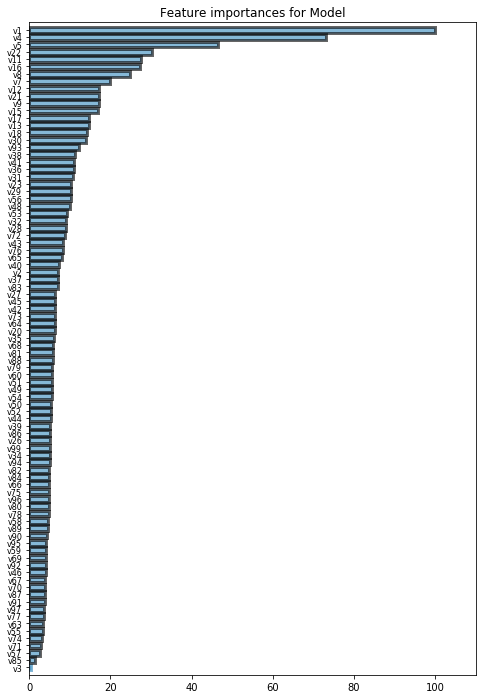

In [9]:
feat_imp_sort_df = feat_imp.feat_imp_xgb(clf, feature_columns)
#feat_imp_sort_df = feat_imp.feat_imp_xgb(clf, clf.booster().feature_names)

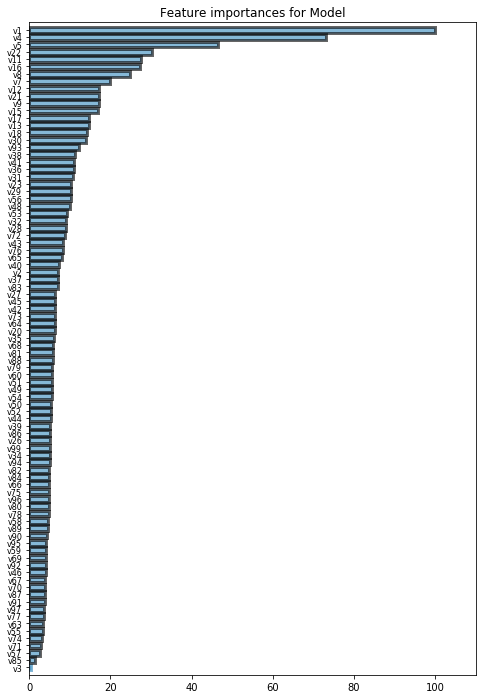

In [10]:
feat_imp_sort_df = feat_imp.feat_imp_xgb(clf, clf.booster().feature_names)

In [11]:
feat_imp_sort_df

,feature,mean,abs_imp,relative_imp
0,v3,0.902257,0.902257,0.524209
1,v85,2.597883,2.597883,1.509364
2,v57,4.720305,4.720305,2.742485
3,v71,5.065325,5.065325,2.942941
4,v74,5.431820,5.431820,3.155874
5,v55,5.722068,5.722068,3.324508
6,v63,5.970892,5.970892,3.469073
7,v77,6.220061,6.220061,3.613840
8,v97,6.274035,6.274035,3.645199
9,v91,6.508806,6.508806,3.781600


## PDP

Partial dependence plot and ICE plot
https://arxiv.org/abs/1309.6392
A tool for visualizing the model estimated by any supervised learning algorithm

In [ ]:
pwd

In [ ]:
df['v1'].value_counts(dropna=False)

In [ ]:
pdp_v4 = pdp.pdp_isolate(clf, df[clf.booster().feature_names], 'v1')
pdp.pdp_plot(pdp_v4, 'v1', plot_org_pts=True, x_quantile=True)

In [ ]:
import io
#from PIL import Image
import matplotlib.pyplot as plt
import base64

#plt.figure()
#plt.plot([1, 2])
#plt.title("test")
pdp.pdp_plot(pdp_v4, 'v9', plot_org_pts=True, x_quantile=True)
buf = io.BytesIO()
plt.savefig(buf, format='png')
buf.seek(0)
img_tag = "<img src='data:image/png;base64," + base64.b64encode(buf.getvalue()) + "'/>"
data = buf.getvalue()
#im = Image.open(buf)
#im.show()
#buf.close()

### Target plot for v1

In [1]:
pdp.target_plot(df, 'v1', 'v1', TARGET)

NameError: name 'pdp' is not defined

### Target plot for v4

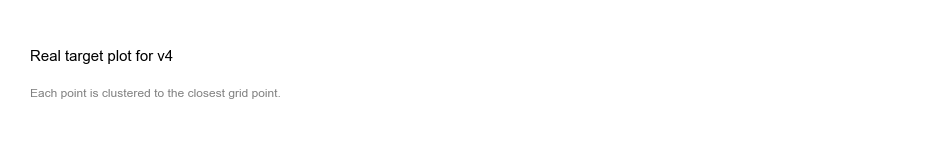

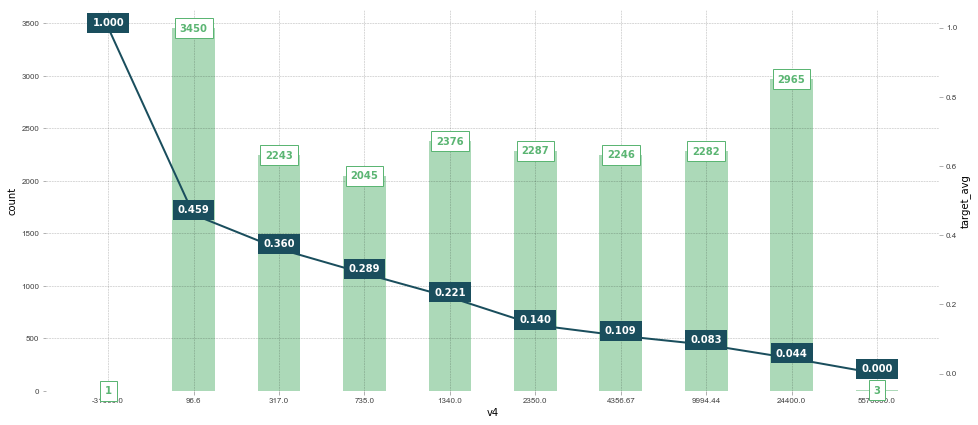

In [12]:
pdp.target_plot(df, 'v4', 'v4', TARGET)

### pdp for v4

In [14]:
pdp_v4 = pdp.pdp_isolate(clf, df[feature_columns], 'v4')

#### plot actual predictions

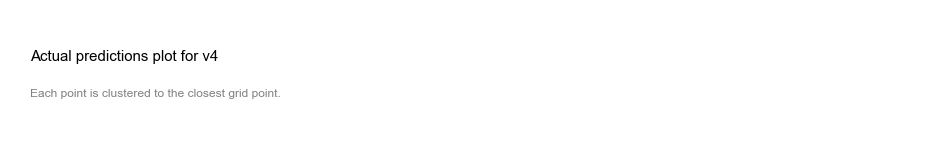

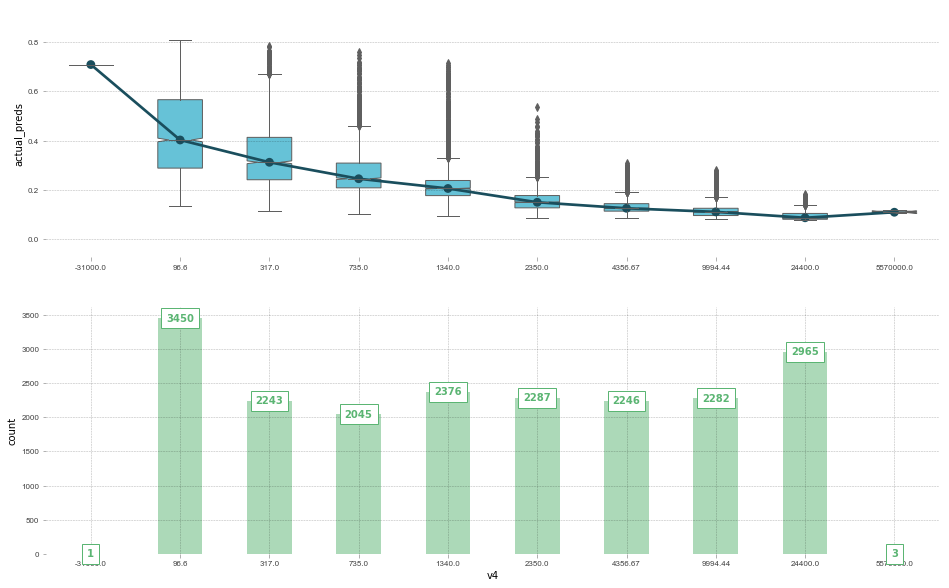

In [15]:
pdp.actual_plot(pdp_v4, 'v4')

#### plot pdp with original points

In [ ]:
pdp.pdp_plot(pdp_v4, 'v4', plot_org_pts=True, plot_lines=True, frac_to_plot=500)

####  set x_quantile=True to make x ticks

In [ ]:
pdp.pdp_plot(pdp_v4, 'v4', plot_org_pts=True, x_quantile=True)

#### cluster all individual lines

In [ ]:
pdp.pdp_plot(pdp_v4, 'v4', plot_org_pts=True, frac_to_plot=0.5, x_quantile=True, cluster=True, n_cluster_centers=10)

### pdp Interactions between two variables

In [ ]:
inter_v1_v4 = pdp.pdp_interact(clf, df[feature_columns], ['v1', 'v4'])

In [ ]:
pdp.pdp_interact_plot(inter_v1_v4, ['v1', 'v4'], center=True, plot_org_pts=True, plot_lines=True, frac_to_plot=0.1, x_quantile=True)